# 1. 데이터 읽기

In [1]:
#csv파일은 용량이 작아 직접업로드 하는것도 시간이 얼마 걸리지 않지만 
#이미지나 weigths처럼 용량이 큰 데이터는 구글드라이브에 업로드 한 뒤 unzip해서 가져오는게 훨씬 편하다.
#중간에 다운되면서 런타임이 다시 연결될 때도 유용하고 매번 새로시작할 때마다 업로드 해아하는 귀찮음이 없어진다.  

!unzip /content/drive/MyDrive/elicer_col_name.zip -d /content/elice_배달데이터

Archive:  /content/drive/MyDrive/elicer_col_name.zip
  inflating: /content/elice_배달데이터/elicer_2019_col_name.csv  
  inflating: /content/elice_배달데이터/elicer_2020_1_col_name.csv  
  inflating: /content/elice_배달데이터/elicer_2020_2_col_name.csv  
  inflating: /content/elice_배달데이터/elicer_2021_col_name.csv  


In [2]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import missingno as msno
import folium #지도출력 라이브러리

## 1.1 데이터 불러오기

In [3]:
#이뉴는 모르겠지만,,2020_1데이터와 2021데이터는 utf-8 인코딩이 안된다.
df_2019=pd.read_csv("/content/elice_배달데이터/elicer_2019_col_name.csv")
df_2020_1=pd.read_csv("/content/elice_배달데이터/elicer_2020_1_col_name.csv", encoding = 'cp949')
df_2020_2=pd.read_csv("/content/elice_배달데이터/elicer_2020_2_col_name.csv")
df_2021=pd.read_csv("/content/elice_배달데이터/elicer_2021_col_name.csv", encoding = 'cp949')

In [4]:
df_2021.head()

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2021-01-01,0,경기도,고양시 덕양구,삼송동,7
1,2021-01-01,0,경기도,고양시 덕양구,원흥동,3
2,2021-01-01,0,경기도,고양시 덕양구,행신동,14
3,2021-01-01,0,경기도,고양시 덕양구,화정동,48
4,2021-01-01,0,경기도,광명시,광명동,13


In [5]:
df_2020_2.head()

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2020-07-01,0,경기도,고양시 덕양구,삼송동,2
1,2020-07-01,0,경기도,고양시 덕양구,토당동,1
2,2020-07-01,0,경기도,고양시 덕양구,행신동,16
3,2020-07-01,0,경기도,고양시 덕양구,화정동,22
4,2020-07-01,0,경기도,고양시 일산서구,일산동,1


In [6]:
df_2019.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426972 entries, 0 to 426971
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   날짜      426972 non-null  object
 1   시간대     426972 non-null  int64 
 2   광역시도    426972 non-null  object
 3   시군구     426972 non-null  object
 4   읍면동     426972 non-null  object
 5   배달건수    426972 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 19.5+ MB


In [7]:
df_2020_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 593847 entries, 0 to 593846
Data columns (total 6 columns):
 #   Column  Non-Null Count   Dtype 
---  ------  --------------   ----- 
 0   날짜      593847 non-null  object
 1   시간대     593847 non-null  int64 
 2   광역시도    593847 non-null  object
 3   시군구     593847 non-null  object
 4   읍면동     593847 non-null  object
 5   배달건수    593847 non-null  int64 
dtypes: int64(2), object(4)
memory usage: 27.2+ MB


# 2. 데이터 정제

## 2.1 결측치 확인

In [8]:
print("2021-----\n",df_2021.isna().sum())
print("\n2020_2-----\n",df_2020_2.isna().sum())
print("\n2020_1-----\n",df_2020_1.isna().sum())
print("\n2019-----\n",df_2019.isna().sum())

2021-----
 날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64

2020_2-----
 날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64

2020_1-----
 날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64

2019-----
 날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64


findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
findfont: Font family ['NanumBarunGothic'] not found. Falling back to DejaVu Sans.
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45216 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 51676 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 49884 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 44036 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 45824 missing from current font.
  font.set_text(

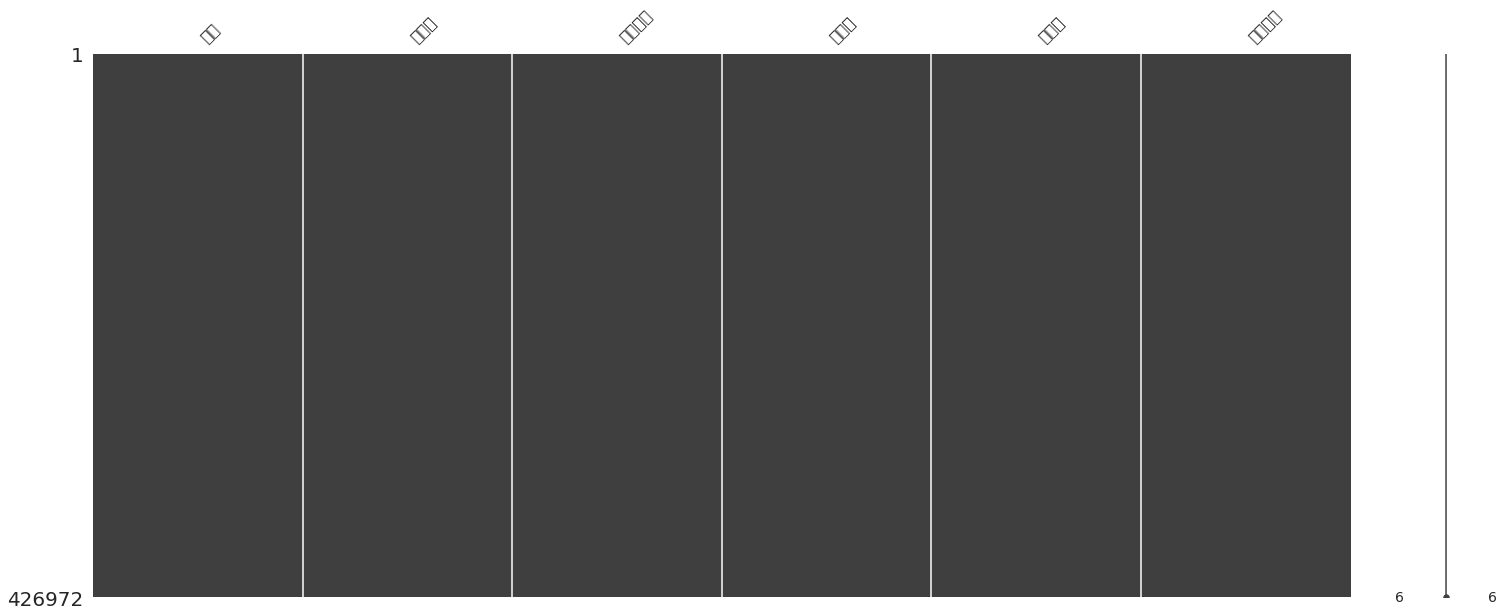

In [9]:
#missingno를 사용하면 한글(컬럼명)이 깨진다.
font_dirs = ['/usr/share/fonts/truetype/nanum', ]
font_files = fm.findSystemFonts(fontpaths=font_dirs)
for font_file in font_files:
    fm.fontManager.addfont(font_file)

sns.set(font="NanumBarunGothic", 
        rc={"axes.unicode_minus":False})
msno.matrix(df_2019)
plt.show()

## 2.2 중복값 확인

In [10]:
#keep=False : 중복값 중 처음과 끝과 관계없이 중복이면 True
print("2021-----\n",df_2021[df_2021.duplicated(keep=False)])
print("\n2020_2-----\n",df_2020_2[df_2020_2.duplicated(keep=False)])
print("\n2020_1-----\n",df_2020_1[df_2020_1.duplicated(keep=False)])
print("\n2019-----\n",df_2019[df_2019.duplicated(keep=False)])

2021-----
 Empty DataFrame
Columns: [날짜, 시간대, 광역시도, 시군구, 읍면동, 배달건수]
Index: []

2020_2-----
 Empty DataFrame
Columns: [날짜, 시간대, 광역시도, 시군구, 읍면동, 배달건수]
Index: []

2020_1-----
 Empty DataFrame
Columns: [날짜, 시간대, 광역시도, 시군구, 읍면동, 배달건수]
Index: []

2019-----
 Empty DataFrame
Columns: [날짜, 시간대, 광역시도, 시군구, 읍면동, 배달건수]
Index: []


# 2.3 데이터 프레임 하나로 모으기

In [11]:
df = pd.concat([df_2019, df_2020_1, df_2020_2, df_2021], ignore_index=True)
df

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2019-08-01,0,강원도,속초시,교동,1
1,2019-08-01,0,경기도,고양시 일산동구,마두동,4
2,2019-08-01,0,경기도,고양시 일산동구,백석동,28
3,2019-08-01,0,경기도,고양시 일산동구,식사동,3
4,2019-08-01,0,경기도,고양시 일산동구,장항동,4
...,...,...,...,...,...,...
2382976,2021-08-31,23,충청남도,천안시 서북구,쌍용동,6
2382977,2021-08-31,23,충청북도,제천시,신백동,6
2382978,2021-08-31,23,충청북도,제천시,신월동,2
2382979,2021-08-31,23,충청북도,제천시,천남동,1


In [12]:
df.isna().sum()

날짜      0
시간대     0
광역시도    0
시군구     0
읍면동     0
배달건수    0
dtype: int64

In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2382981 entries, 0 to 2382980
Data columns (total 6 columns):
 #   Column  Dtype 
---  ------  ----- 
 0   날짜      object
 1   시간대     int64 
 2   광역시도    object
 3   시군구     object
 4   읍면동     object
 5   배달건수    int64 
dtypes: int64(2), object(4)
memory usage: 109.1+ MB


In [14]:
## 저장 - 파일 용량이 너무 커서 엑셀로 로드가 안됨.
# df.to_csv("/content/elice_배달데이터/elicer_2019_2021.csv", index=False, encoding="utf-8-sig")
# df.to_csv("/content/drive/MyDrive/elicer_2019_2021.csv", index=False, encoding="utf-8-sig")

# 3. 데이터 시각화
무엇을 시각화 해야할까?
2019~2021까지 서울지역 구별 평균?
2019년도의 시간대별 평균?
2020년 시간대별 평균?


## 3.1 서울지역 시간대별

## 3.2 서울 지역별

In [15]:
df['광역시도'].unique()

array(['강원도', '경기도', '경상남도', '대전광역시', '서울특별시', '전라남도', '전라북도', '제주특별자치도',
       '충청남도', '충청북도', '경상북도', '대구광역시', '부산광역시', '광주광역시', '인천광역시',
       '울산광역시', '세종특별자치시'], dtype=object)

In [16]:
df_seoul = df[df['광역시도']=='서울특별시'].reset_index(drop=True)
df_seoul

,날짜,시간대,광역시도,시군구,읍면동,배달건수
0,2019-08-01,0,서울특별시,구로구,개봉동,13
1,2019-08-01,0,서울특별시,구로구,고척동,4
2,2019-08-01,0,서울특별시,구로구,구로동,9
3,2019-08-01,0,서울특별시,구로구,오류동,3
4,2019-08-01,0,서울특별시,금천구,독산동,3
...,...,...,...,...,...,...
357208,2021-08-31,23,서울특별시,동작구,사당동,7
357209,2021-08-31,23,서울특별시,양천구,신정동,1
357210,2021-08-31,23,서울특별시,영등포구,신길동,5
357211,2021-08-31,23,서울특별시,영등포구,영등포동,1


* 시간대별로 평균 내기

In [78]:
df_seoul_2019 = df_seoul[df_seoul['날짜'].str.startswith('2019')].groupby('시간대').sum('배달건수')
df_seoul_2019 = df_seoul_2019.rename(columns={"배달건수":"count"})
df_seoul_2019.index.name = "time"
df_seoul_2019

,count
time,
0,12060
1,5845
2,1843
3,561
4,484
5,404
6,426
7,407
8,436


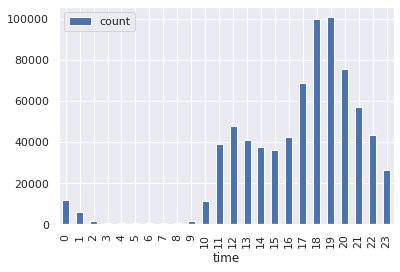

In [80]:
df_seoul_2019.plot(kind="bar") #적은 시간대가 거의 보이지 않는다. seaborn을 이용하고 싶다.마우스를 올리면 몇개인지 알고싶다. 